In [ ]:
# Install TensorFlow
%pip install tensorflow

In [ ]:
# Import TensorFlow, Keras, and tools for label encoding
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Set the vocabulary size and sequence length for our tokenizer and padding
max_words = 20000
maxlen = 200

In [ ]:
# Convert text to padded sequences for the LSTM model
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(train_df['clean_text'])
X_test_seq  = tokenizer.texts_to_sequences(test_df['clean_text'])
X_train = keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_test  = keras.preprocessing.sequence.pad_sequences(X_test_seq,  maxlen=maxlen, padding='post', truncating='post')

In [ ]:
# Encode the labels as integers and one-hot vectors for training
le = LabelEncoder()
y_train = le.fit_transform(train_df['label'])
y_test  = le.transform(test_df['label'])
num_classes = len(le.classes_)
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat  = keras.utils.to_categorical(y_test,  num_classes)

In [ ]:
# Build a simple LSTM model for text classification
embedding_dim = 128
model = keras.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    layers.Bidirectional(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

c:\Coding Segment\Projects\Project\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile and train the LSTM model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, validation_split=0.1, epochs=5, batch_size=64)

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 187s 637ms/step - accuracy: 0.7722 - loss: 0.4710 - val_accuracy: 0.8415 - val_loss: 0.3729
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 187s 637ms/step - accuracy: 0.7722 - loss: 0.4710 - val_accuracy: 0.8415 - val_loss: 0.3729
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 176s 626ms/step - accuracy: 0.8989 - loss: 0.2676 - val_accuracy: 0.8105 - val_loss: 0.4034
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 176s 626ms/step - accuracy: 0.8989 - loss: 0.2676 - val_accuracy: 0.8105 - val_loss: 0.4034
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 174s 617ms/step - accuracy: 0.9316 - loss: 0.1895 - val_accuracy: 0.8505 - val_loss: 0.4200
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 174s 617ms/step - accuracy: 0.9316 - loss: 0.1895 - val_accuracy: 0.8505 - val_loss: 0.4200
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 202s 618ms/step - accuracy: 0.9594 - loss: 0.1228 - val_accuracy: 0.8375 - val_loss: 0.4430
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 202s 618ms/step - accuracy: 0.9594 - loss: 0

In [ ]:
# Evaluate the model on the test set and calculate metrics
y_pred_prob = model.predict(X_test)
y_pred_idx = y_pred_prob.argmax(axis=1)
acc = accuracy_score(y_test, y_pred_idx)
prec = precision_score(y_test, y_pred_idx, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred_idx, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_idx, average='weighted', zero_division=0)

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step


In [ ]:
# Show accuracy, precision, recall, and F1-score
print(f'Accuracy  : {acc:.4f}')
print(f'Precision : {prec:.4f}')
print(f'Recall    : {rec:.4f}')
print(f'F1-score  : {f1:.4f}')

Accuracy  : 0.8310
Precision : 0.8310
Recall    : 0.8310
F1-score  : 0.8310


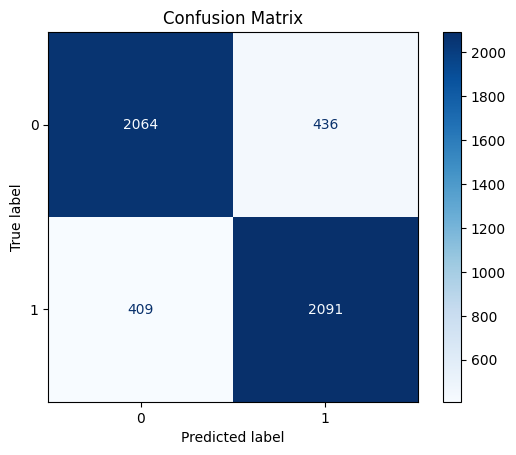

In [ ]:
# Visualize the confusion matrix for our predictions
cm = confusion_matrix(y_test, y_pred_idx)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Save the trained LSTM model to a file
model.save('lstm_model.h5')

In [29]:
# Save the tokenizer and label encoder for future predictions
import joblib
joblib.dump(tokenizer, 'tokenizer.joblib')
joblib.dump(le, 'encoder.joblib')
'Saved'

'Saved'

In [31]:
# Try out the model: predict sentiment for a custom sentence
model = tf.keras.models.load_model('lstm_model.h5')
tokenizer = joblib.load('tokenizer.joblib')
le = joblib.load('encoder.joblib')

def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=200, padding='post', truncating='post')
    pred_idx = np.argmax(model.predict(padded), axis=1)[0]
    label = le.classes_[pred_idx]
    if str(label) == "1":
        return "Positive"
    elif str(label) == "0":
        return "Negative"
    else:
        return label

user_input = input("Enter a sentence: ")
print("Predicted sentiment:", predict_sentiment(user_input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step
Predicted sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step
Predicted sentiment: Positive
